# PROBLEM STATEMENT AND OBJECTIVE

Develop a predictive model that assesses the claim probability for car insurance policies. The objective would be to understand the factors that influence claim frequency and severity in the period of six months and enable insurance companies to better assess risk and determine appropriate premiums for policyholders.


In [157]:
#Below are the step which we will follow

# Step:1 - Importing all the necessary libraries

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [ ]:
age=10

# Step:2 - Reading and understanding the data 


In [159]:
#Saving the csv file in a pandas dataframe as df and reading it
df = pd.read_csv(r"E:\Learnbay\Placement\Projects\TRIAL 1\DS\Insurance_Data (1).csv")
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [160]:
#Creating a copy of the dataset
df_1 =df.copy()

In [161]:
df_1.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [162]:
#Getting info of the dataset
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [163]:
#Shape of the dataset
df_1.shape

#There are 58592 rows and 44 columns in this dataset

(58592, 44)

In [164]:
#Description of the data
df_1.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [165]:
df_1.describe(include= 'O')

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
count,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592
unique,58592,22,6,11,3,9,9,11,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2
top,ID00001,C8,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,No,Yes,No,Yes,No,Drum,Manual,Power,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
freq,1,13654,18314,14948,20532,17796,17796,14948,40191,35526,44574,56219,35704,44574,38181,33502,33928,41634,41634,38077,32177,42435,42435,57383,34291,36309,42435,58229


# Step:3 - Cleaning the data 

In [166]:
#Checking for missing data or null values per column

df_1.isnull().sum()*100/df.shape[0]

policy_id                           0.0
policy_tenure                       0.0
age_of_car                          0.0
age_of_policyholder                 0.0
area_cluster                        0.0
population_density                  0.0
make                                0.0
segment                             0.0
model                               0.0
fuel_type                           0.0
max_torque                          0.0
max_power                           0.0
engine_type                         0.0
airbags                             0.0
is_esc                              0.0
is_adjustable_steering              0.0
is_tpms                             0.0
is_parking_sensors                  0.0
is_parking_camera                   0.0
rear_brakes_type                    0.0
displacement                        0.0
cylinder                            0.0
transmission_type                   0.0
gear_box                            0.0
steering_type                       0.0


In [167]:
#Checking for duplicate rows and columns

df_1.duplicated().value_counts()

False    58592
dtype: int64

In [168]:
df_1.duplicated(subset =df.columns ).value_counts()

False    58592
dtype: int64

There are no missing/null values in each column and also no duplicates

In [169]:
#Checking out the data types of each column
df_1.dtypes

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

In [170]:
df_1.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [171]:
#dropping columns which dont mean much to the target variable
df_1.drop(columns=["policy_id","max_torque","max_power","engine_type","gear_box","turning_radius","cylinder"],axis=1, inplace=True)

In [172]:
df_1.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,transmission_type,steering_type,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,2,No,No,No,Yes,No,Drum,796,Manual,Power,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,2,No,No,No,Yes,No,Drum,796,Manual,Power,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,2,No,No,No,Yes,No,Drum,796,Manual,Power,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,2,Yes,Yes,No,Yes,Yes,Drum,1197,Automatic,Electric,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,2,No,No,No,No,Yes,Drum,999,Automatic,Electric,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [173]:
numerical_cols = df_1.select_dtypes(exclude=object).columns
object_cols = df_1.select_dtypes(include=object).columns
print(numerical_cols)
print("\n")
print(object_cols)

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'length',
       'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')


Index(['area_cluster', 'segment', 'model', 'fuel_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')


In [174]:
df_1[numerical_cols].var()
#There is no feature with variance as zero to be dropped

policy_tenure          1.715256e-01
age_of_car             3.217232e-03
age_of_policyholder    1.510094e-02
population_density     3.118818e+08
make                   1.292741e+00
airbags                3.358574e+00
displacement           7.091824e+04
length                 9.700554e+04
width                  1.256397e+04
height                 6.339706e+03
gross_weight           4.512357e+04
ncap_rating            1.930923e+00
is_claim               5.987692e-02
dtype: float64

In [175]:
#Checking for numerical categorical columns which have unique values less than 11

df_1[numerical_cols].nunique()

policy_tenure          58592
age_of_car                49
age_of_policyholder       75
population_density        22
make                       5
airbags                    3
displacement               9
length                     9
width                     10
height                    11
gross_weight              10
ncap_rating                5
is_claim                   2
dtype: int64

From the above we can see that features like make, airbags,displacement,length, width,height,grossweight and ncap_rating can be considered as numerical categorical columns

In [176]:
numeric_cols= []
categoric_cols= []
for i in df_1.columns:
    if df_1[i].dtype !=object:
        if df_1[i].nunique()>11:
            numeric_cols.append(i)
        else:
            categoric_cols.append(i)
            
print(numeric_cols)
print(categoric_cols)

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density']
['make', 'airbags', 'displacement', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim']


In [177]:
for i in df_1.columns:
    if df_1[i].dtype ==object:
        categoric_cols.append(i)
print(categoric_cols)

['make', 'airbags', 'displacement', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim', 'area_cluster', 'segment', 'model', 'fuel_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


In [178]:
print(numeric_cols,"\n")
print(categoric_cols)

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density'] 

['make', 'airbags', 'displacement', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim', 'area_cluster', 'segment', 'model', 'fuel_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


<function matplotlib.pyplot.show(close=None, block=None)>

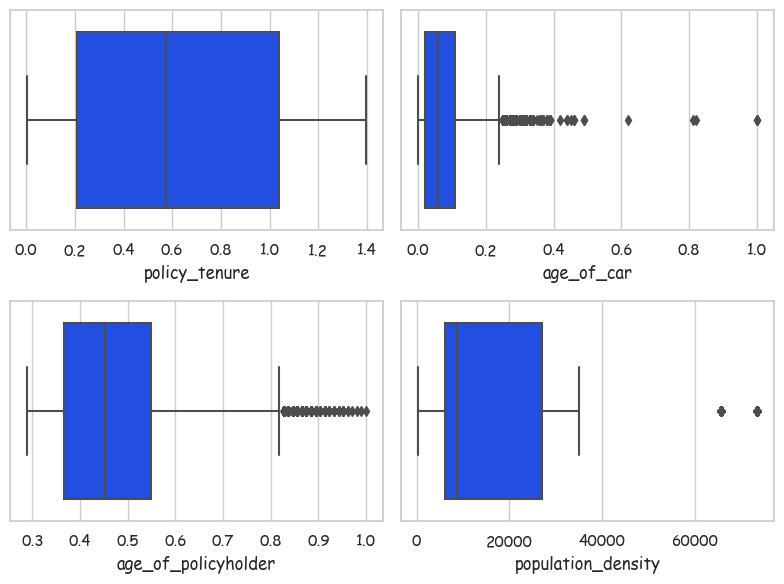

In [179]:
#Checking for outliers using boxplot
sns.set_theme(style="whitegrid", palette ="bright", font="cursive", font_scale=1.0)

fig,ax = plt.subplots(2,2, figsize=(8,6), dpi=100)

index=0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=df_1,x=df_1[numeric_cols[index]], ax=ax[i,j])
        plt.xlabel(numeric_cols[index])
        index+=1
        
plt.tight_layout()
plt.show
    

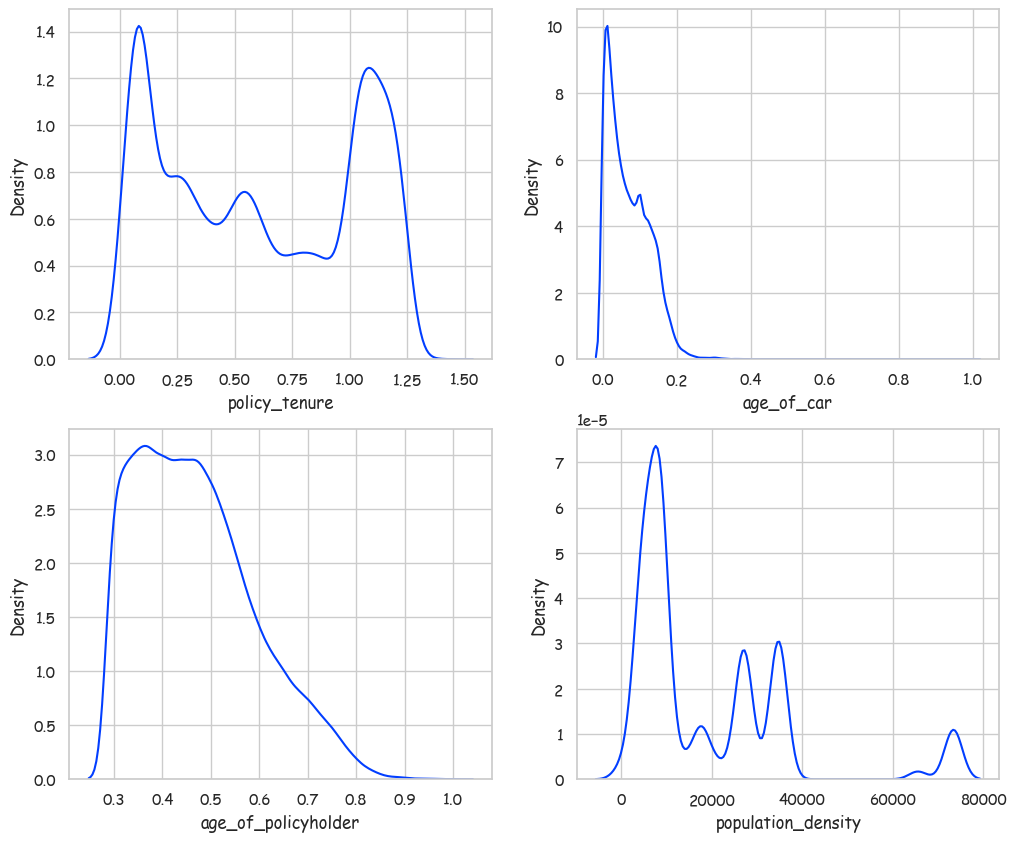

In [180]:
#Checking for Distribution of data using kdeplot

fig,jx = plt.subplots(2,2, figsize=(12,10),dpi=100)

index=0
for i in range(2):
    for j in range(2):
        sns.kdeplot(data=df_1, x=df_1[numeric_cols[index]], ax = jx[i,j])
        plt.xlabel(numeric_cols[index])
        
        index+=1
plt.tight_layout
plt.show()

In [181]:
#Checking for Outliers using IQR method since the data points are not normally distributed

for i in numeric_cols:

    Q1 = df_1[i].quantile(0.25)
    Q3 = df_1[i].quantile(0.75)

    IQR = Q3-Q1

    upper_limit = Q3+1.5*IQR
    lower_limit = Q1-1.5*IQR
    
    print(f" For {i} the upper_limit = {np.round(upper_limit,2)} and lower_limit = {np.round(lower_limit,2)} and no.of outliers is {df_1[((df_1[i]>upper_limit)|(df_1[i]<lower_limit))].shape[0]} \n")


 For policy_tenure the upper_limit = 2.28 and lower_limit = -1.03 and no.of outliers is 0 

 For age_of_car the upper_limit = 0.24 and lower_limit = -0.12 and no.of outliers is 269 

 For age_of_policyholder the upper_limit = 0.82 and lower_limit = 0.09 and no.of outliers is 221 

 For population_density the upper_limit = 58339.5 and lower_limit = -25224.5 and no.of outliers is 3647 



In [182]:
#For age_of_car the upper_limit = 0.24 and lower_limit = -0.12 and no.of outliers is 269 

#For age_of_policyholder the upper_limit = 0.82 and lower_limit = 0.09 and no.of outliers is 221 

#For population_density the upper_limit = 58339.5 and lower_limit = -25224.5 and no.of outliers is 3647 

In [183]:
#Removing Outliers from the data
df_1 = df_1[(df_1['age_of_car']<0.24) & (df_1['age_of_car']>-0.12) ]
df_1 = df_1[(df_1['age_of_policyholder']<0.82) & (df_1['age_of_policyholder']>0.09) ]
df_1 = df_1[(df_1['population_density']<58339.5) & (df_1['population_density']>-25224.5) ]

In [184]:
for i in numeric_cols:

    Q1 = df_1[i].quantile(0.25)
    Q3 = df_1[i].quantile(0.75)

    IQR = Q3-Q1

    upper_limit = Q3+1.5*IQR
    lower_limit = Q1-1.5*IQR
    
    print(f" For {i} the upper_limit = {np.round(upper_limit,2)} and lower_limit = {np.round(lower_limit,2)} and no.of outliers is {df_1[((df_1[i]>upper_limit)|(df_1[i]<lower_limit))].shape[0]} \n")


 For policy_tenure the upper_limit = 2.29 and lower_limit = -1.03 and no.of outliers is 0 

 For age_of_car the upper_limit = 0.24 and lower_limit = -0.12 and no.of outliers is 0 

 For age_of_policyholder the upper_limit = 0.82 and lower_limit = 0.09 and no.of outliers is 0 

 For population_density the upper_limit = 58339.5 and lower_limit = -25224.5 and no.of outliers is 0 



In [185]:
df_1.shape

(54421, 37)

In [186]:
df.shape

(58592, 44)

# Binning

In [187]:
for i in categoric_cols:
    print(df_1[i].value_counts())
    print("*"*25)

1    35183
3    13216
2     2232
5     1990
4     1800
Name: make, dtype: int64
*************************
2    37302
6    15983
1     1136
Name: airbags, dtype: int64
*************************
1197    16679
796     13430
1493    13216
998      3938
999      2232
1498     1990
1497     1471
1196     1136
1199      329
Name: displacement, dtype: int64
*************************
3445    13430
4300    13216
3845    12902
3990     4238
3655     3938
3995     3000
3731     2232
3675     1136
3993      329
Name: length, dtype: int64
*************************
1735    13912
1515    13430
1790    13216
1620     3938
1745     2767
1579     2232
1695     1990
1755     1471
1475     1136
1811      329
Name: width, dtype: int64
*************************
1475    13430
1635    13216
1530    12902
1675     3938
1500     2767
1490     2232
1501     1990
1523     1471
1825     1136
1515     1010
1606      329
Name: height, dtype: int64
*************************
1335    13912
1185    13430
1720    13216
13

As per the above state no binning is required as all the values in each column has considerable frequency of values

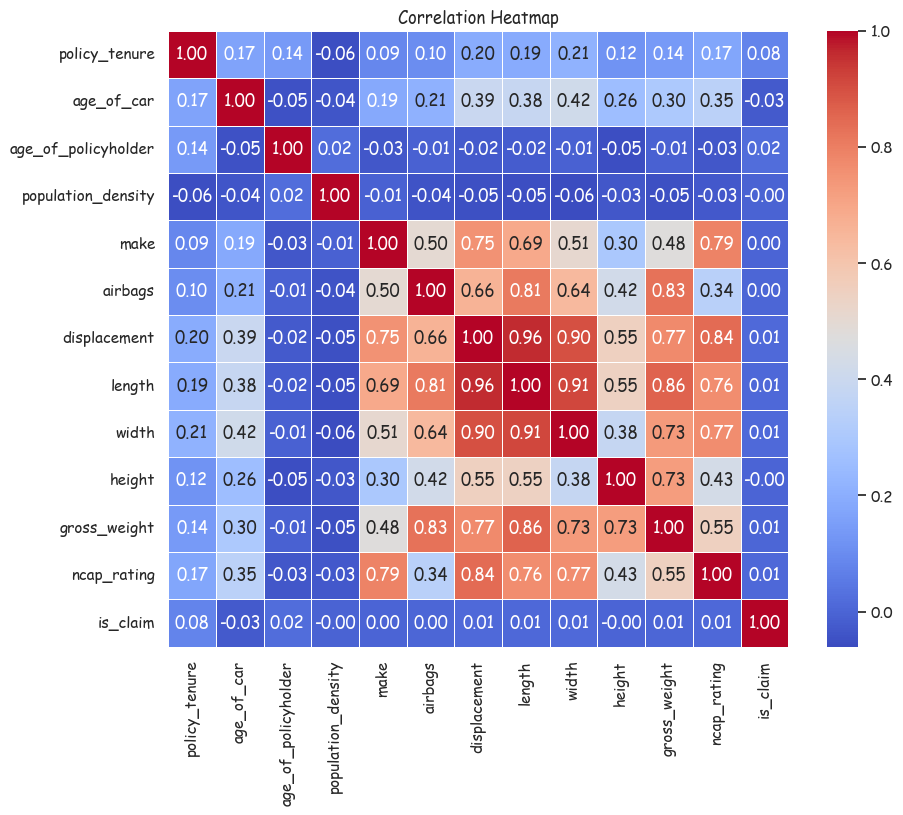

In [188]:
#Correlation between independent features and dependent features
corr_matrix = df_1.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Make and height have very less correlation with the target variable is_claim. But i wont drop it as make and height also influence the premiums of insurance claims. We can also see that length, width, ncap_rating have high correlation with displacement, length and airbags have high correlation gross weight. I have not dropped any columns as I think they might provide valuable insights 


In [189]:
df_1.shape

(54421, 37)

In [190]:
#EDA Analaysis

<Axes: xlabel='is_claim', ylabel='count'>

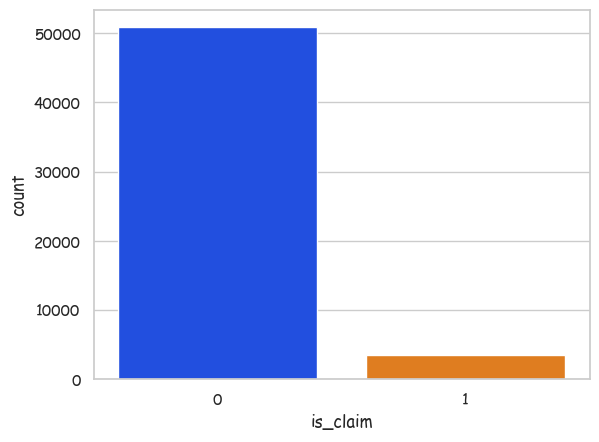

In [191]:
#Finding out the count of values in target variable

sns.countplot(data=df_1,x=df_1["is_claim"])

We can see that the no. of filed insurance claims are less when compared to the no insurance claims filed.
Also from this we know that the data is highly biased

In [192]:
df_1["is_claim"].value_counts()

0    50876
1     3545
Name: is_claim, dtype: int64

In [193]:
#Finding out the relation between population density and insurance claims

a=df_1[["population_density","is_claim"]].groupby(["population_density","is_claim"]).size().reset_index().rename(columns={0:"Count_of_claims"})

In [194]:
print(a)

    population_density  is_claim  Count_of_claims
0                  290         0              730
1                  290         1               38
2                 3264         0              348
3                 3264         1               29
4                 4076         0             5642
5                 4076         1              431
6                 4990         0             1384
7                 4990         1               74
8                 5410         0             3198
9                 5410         1              192
10                6108         0             1132
11                6108         1               72
12                6112         0             2050
13                6112         1              107
14                7788         0             3344
15                7788         1              279
16                8794         0            12482
17                8794         1              937
18               13051         0              825


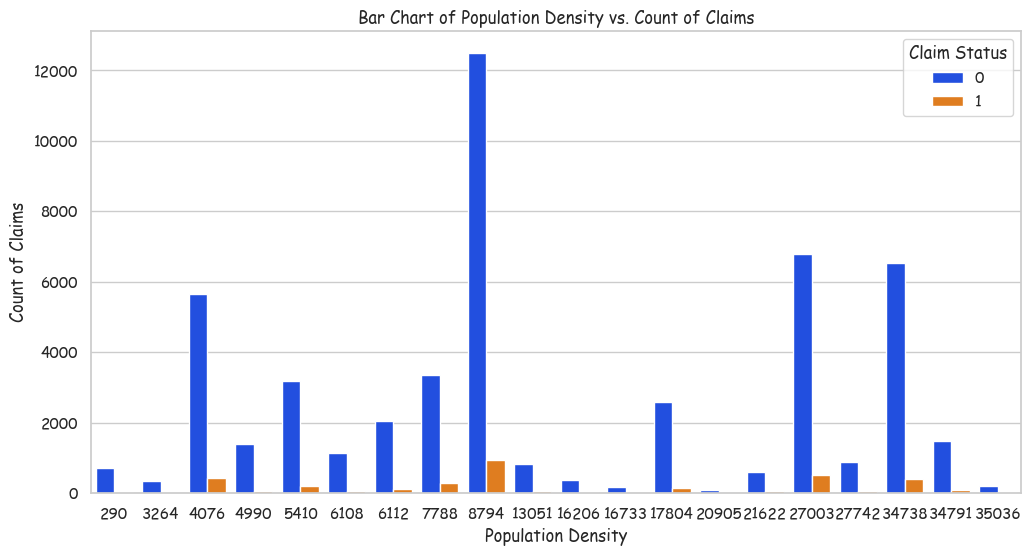

In [195]:
plt.figure(figsize=(12, 6))
sns.barplot(data=a, x='population_density', y='Count_of_claims', hue='is_claim')
plt.title('Bar Chart of Population Density vs. Count of Claims')
plt.xlabel('Population Density')
plt.ylabel('Count of Claims')
plt.legend(title='Claim Status', loc='upper right')
plt.show()

We can see here that the maximum number of insurance claims is at population density of 8794 followed by population desnity of 27003 and 34738

In [196]:
df_1.head(100)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,transmission_type,steering_type,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,2,No,No,No,Yes,No,Drum,796,Manual,Power,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,2,No,No,No,Yes,No,Drum,796,Manual,Power,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,2,No,No,No,Yes,No,Drum,796,Manual,Power,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,2,Yes,Yes,No,Yes,Yes,Drum,1197,Automatic,Electric,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,2,No,No,No,No,Yes,Drum,999,Automatic,Electric,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,Automatic,Power,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,2,No,Yes,No,Yes,No,Drum,1497,Manual,Electric,3990,1755,1523,1490,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,2,No,Yes,No,Yes,No,Drum,1197,Manual,Electric,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,Automatic,Power,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,6,Yes,Yes,No,Yes,Yes,Drum,1197,Automatic,Electric,3990,1745,1500,1410,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


In [197]:
#Finding out the relation between cars of different fuel types and insurance claims

fuel_claim = df_1[["fuel_type","is_claim"]].groupby(["fuel_type","is_claim"]).size().reset_index().rename(columns = {0:"Count_of_claims"})
print(fuel_claim)

  fuel_type  is_claim  Count_of_claims
0       CNG         0            17369
1       CNG         1             1135
2    Diesel         0            15567
3    Diesel         1             1110
4    Petrol         0            17940
5    Petrol         1             1300


<Axes: xlabel='fuel_type', ylabel='Count_of_claims'>

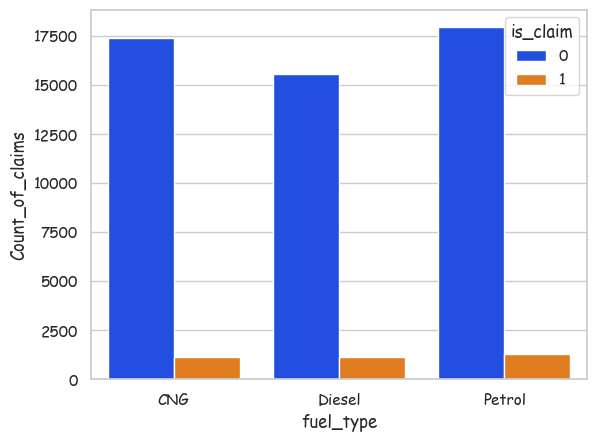

In [198]:
sns.barplot(data=fuel_claim, x="fuel_type", y="Count_of_claims",hue="is_claim")

We can observe that the maximum no. of insurance claims is from a petrol vehicle followed by CNG and then Diesel.


Text(0.5, 0, 'Electronic Stability Control')

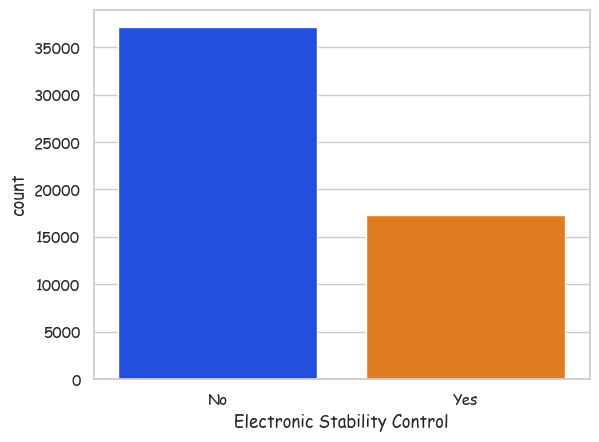

In [199]:
#Finding out the relation between cars with electronic stability control and insurance claims

sns.countplot(data=df_1, x = "is_esc")
plt.xlabel("Electronic Stability Control")

In [200]:
df_1["is_esc"].value_counts()

No     37099
Yes    17322
Name: is_esc, dtype: int64

From the given data we can observe that 68% of the people do not have Electronic stability control in their vehicles and only 32% of the people have ESC

In [201]:
esc = df_1[["is_esc","is_claim"]].groupby(["is_esc","is_claim"]).size().reset_index().rename(columns={0:"Count_of_claims"})
esc

,is_esc,is_claim,Count_of_claims
0,No,0,34705
1,No,1,2394
2,Yes,0,16171
3,Yes,1,1151


Text(0.5, 0, 'Electronic stability control ')

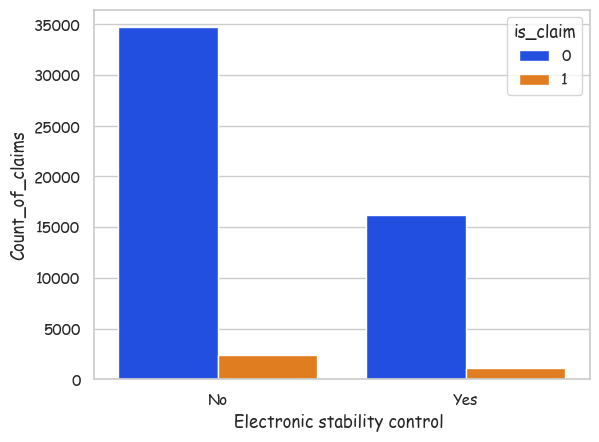

In [202]:
sns.barplot(data=esc, x="is_esc", y="Count_of_claims",hue="is_claim")
plt.xlabel("Electronic stability control ")

From the given data we can observe that 6.64% of people with vehicles having electronic stability control(ESC) have claimed for insurance and 6.45% of the people not having ESC have claimed for insurance. This means that people without ESC drive more carefully as than people with ESC

Text(0.5, 0, 'Tire pressure monitoring system')

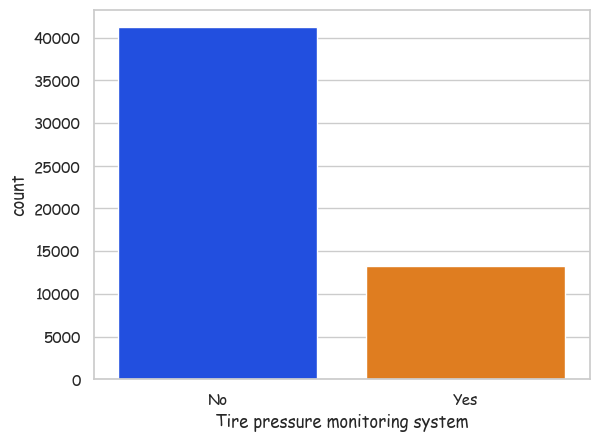

In [203]:
#Finding out the relation between cars with Tire Pressure Monitoring System and insurance claims

sns.countplot(data=df_1, x = "is_tpms")
plt.xlabel('Tire pressure monitoring system')

In [204]:
df_1["is_tpms"].value_counts()

No     41205
Yes    13216
Name: is_tpms, dtype: int64

From the given data we can observe that 75% of the people do not have Tire pressure monitoring system in their vehicles and only 25% of the people have TPMS

In [205]:
tpms = df_1[["is_tpms","is_claim"]].groupby(["is_tpms","is_claim"]).size().reset_index().rename(columns={0:"Count_of_claims"})
tpms

,is_tpms,is_claim,Count_of_claims
0,No,0,38529
1,No,1,2676
2,Yes,0,12347
3,Yes,1,869


Text(0.5, 0, 'Tire pressure monitoring system')

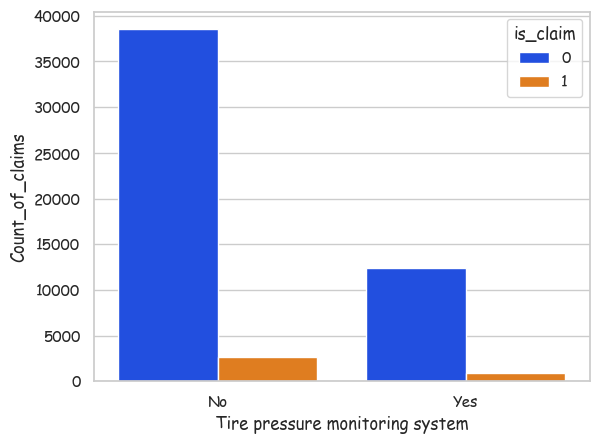

In [206]:
sns.barplot(data=tpms, x="is_tpms", y="Count_of_claims",hue="is_claim")
plt.xlabel('Tire pressure monitoring system')

From the given data we can observe that 6.57% of people with vehicles having Tire pressure monitoring system(TPMS) have claimed for insurance and 6.49% of the people not having ESC have claimed for insurance. This means that people without TPMS drive as carefully as people with TPMS

Text(0.5, 0, 'Electronic Crash Warning')

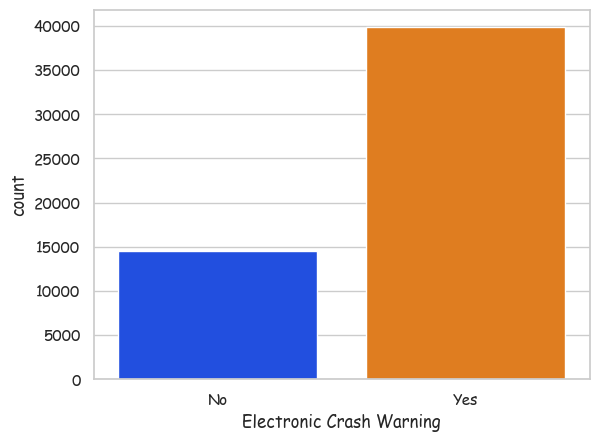

In [207]:
#Finding out the relation between cars with Electronic Crash Warning System and insurance claims

sns.countplot(data=df_1, x = "is_ecw")
plt.xlabel('Electronic Crash Warning')

In [208]:
df_1['is_ecw'].value_counts()

Yes    39855
No     14566
Name: is_ecw, dtype: int64

From the given data we observe that 73.23% of the people have Electonic Crash Warning System in their vehicles and 26.77% do not have ECW in their vehicles.

In [209]:
ecw = df_1[["is_ecw","is_claim"]].groupby(["is_ecw","is_claim"]).size().reset_index().rename(columns={0:"Count_of_claims"})
ecw

,is_ecw,is_claim,Count_of_claims
0,No,0,13666
1,No,1,900
2,Yes,0,37210
3,Yes,1,2645


Text(0.5, 0, 'Electonic Crash Warning System ')

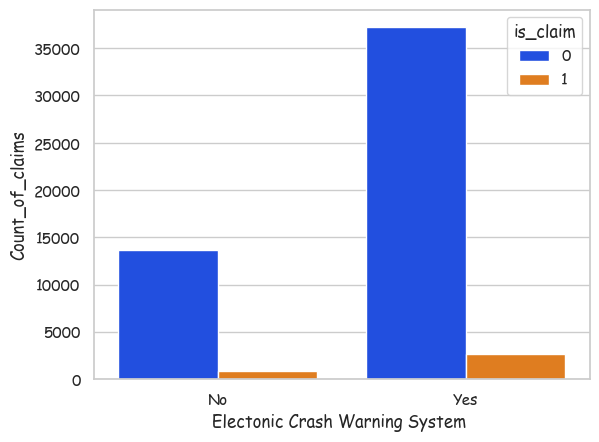

In [210]:
sns.barplot(data=ecw, x="is_ecw", y="Count_of_claims",hue="is_claim")
plt.xlabel('Electonic Crash Warning System ')

From the given data we can observe that 6.63% of people with vehicles having Electronic Crash Warning System(ECW) have claimed for insurance and 6.17% of the people not having ESC have claimed for insurance. This means that people without ECW drive carefully as people with ECW

Text(0.5, 0, 'Speed alert system')

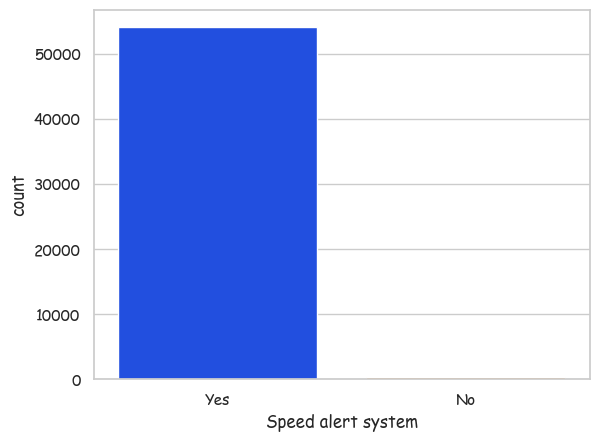

In [211]:
#Finding out the relation between cars with Speed Alert System and insurance claims

sns.countplot(data=df_1, x = "is_speed_alert")
plt.xlabel('Speed alert system')

In [212]:
df_1["is_speed_alert"].value_counts()

Yes    54092
No       329
Name: is_speed_alert, dtype: int64

99.3% of the people have speed alert system in their vehicles

In [213]:
S_alert = df_1[["is_speed_alert","is_claim"]].groupby(["is_speed_alert","is_claim"]).size().reset_index().rename(columns={0:"Count_of_claims"})
S_alert

,is_speed_alert,is_claim,Count_of_claims
0,No,0,316
1,No,1,13
2,Yes,0,50560
3,Yes,1,3532


Text(0.5, 0, 'Speed alert System ')

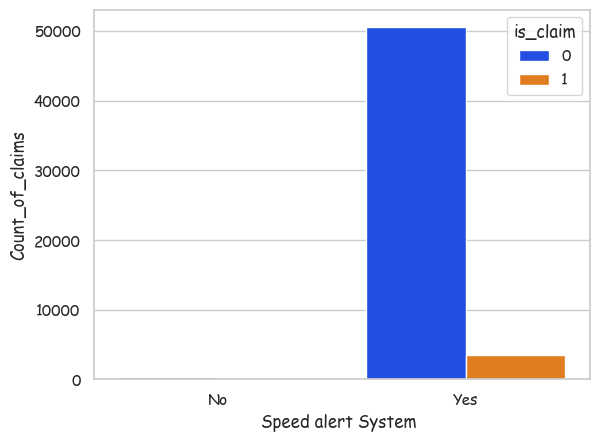

In [214]:
sns.barplot(data=S_alert, x="is_speed_alert", y="Count_of_claims",hue="is_claim")
plt.xlabel('Speed alert System ')


From the given data we can observe that 6.52% of people with vehicles having Speed alert System have claimed for insurance 

In [215]:
#Finding out the relation between length, weight, height and gross weight of the car with insurance claims 

dim = df_1[["length","width","height","gross_weight","is_claim"]].groupby(["length","width","height","gross_weight","is_claim"]).size().reset_index().rename(columns={0:"Count_of_claims"})
dim

,length,width,height,gross_weight,is_claim,Count_of_claims
0,3445,1515,1475,1185,0,12601
1,3445,1515,1475,1185,1,829
2,3655,1620,1675,1340,0,3703
3,3655,1620,1675,1340,1,235
4,3675,1475,1825,1510,0,1065
5,3675,1475,1825,1510,1,71
6,3731,1579,1490,1155,0,2114
7,3731,1579,1490,1155,1,118
8,3845,1735,1530,1335,0,12002
9,3845,1735,1530,1335,1,900


In [216]:
dim[dim["is_claim"]==1].sort_values(by="Count_of_claims", ascending=False).reset_index().drop("index",axis=1)

,length,width,height,gross_weight,is_claim,Count_of_claims
0,3845,1735,1530,1335,1,900
1,4300,1790,1635,1720,1,869
2,3445,1515,1475,1185,1,829
3,3655,1620,1675,1340,1,235
4,3990,1745,1500,1410,1,190
5,3995,1695,1501,1051,1,130
6,3731,1579,1490,1155,1,118
7,3990,1755,1523,1490,1,111
8,3995,1735,1515,1335,1,79
9,3675,1475,1825,1510,1,71


The above table gives the no. of claims in descending order w.r.t the length, weight, height and gross weight of the car 

In [217]:
df_1.shape

(54421, 37)

# ENCODING

In [218]:
df_1.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,transmission_type,steering_type,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,2,No,No,No,Yes,No,Drum,796,Manual,Power,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,2,No,No,No,Yes,No,Drum,796,Manual,Power,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,2,No,No,No,Yes,No,Drum,796,Manual,Power,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,2,Yes,Yes,No,Yes,Yes,Drum,1197,Automatic,Electric,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,2,No,No,No,No,Yes,Drum,999,Automatic,Electric,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [219]:
#If the unique values in categorical columns are greater than 3 then label encoding is done else one hot encoding is done

categoric_cols

['make',
 'airbags',
 'displacement',
 'length',
 'width',
 'height',
 'gross_weight',
 'ncap_rating',
 'is_claim',
 'area_cluster',
 'segment',
 'model',
 'fuel_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [220]:
df_1[categoric_cols].nunique()

make                                 5
airbags                              3
displacement                         9
length                               9
width                               10
height                              11
gross_weight                        10
ncap_rating                          5
is_claim                             2
area_cluster                        20
segment                              6
model                               11
fuel_type                            3
is_esc                               2
is_adjustable_steering               2
is_tpms                              2
is_parking_sensors                   2
is_parking_camera                    2
rear_brakes_type                     2
transmission_type                    2
steering_type                        3
is_front_fog_lights                  2
is_rear_window_wiper                 2
is_rear_window_washer                2
is_rear_window_defogger              2
is_brake_assist          

In [221]:
df_1["area_cluster"].value_counts()

C8     13419
C2      7293
C5      6944
C3      6073
C14     3623
C13     3390
C9      2711
C7      2157
C12     1562
C1      1458
C11     1204
C19      947
C6       880
C15      768
C4       660
C16      401
C21      377
C18      242
C22      205
C20      107
Name: area_cluster, dtype: int64

In [222]:
df_1.drop(columns='area_cluster',axis=1,inplace=True)
#Dropping area_cluster as the same unique values have corresponding same population densities

In [223]:
df_1.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,fuel_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,transmission_type,steering_type,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,4990,1,A,M1,CNG,2,No,No,No,Yes,No,Drum,796,Manual,Power,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,27003,1,A,M1,CNG,2,No,No,No,Yes,No,Drum,796,Manual,Power,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,4076,1,A,M1,CNG,2,No,No,No,Yes,No,Drum,796,Manual,Power,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,21622,1,C1,M2,Petrol,2,Yes,Yes,No,Yes,Yes,Drum,1197,Automatic,Electric,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,34738,2,A,M3,Petrol,2,No,No,No,No,Yes,Drum,999,Automatic,Electric,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [224]:
#Lable Encoding of Segment and Model columns using map
df_1["segment"].value_counts()

B2         17140
A          15662
C2         13216
B1          3938
C1          3329
Utility     1136
Name: segment, dtype: int64

In [225]:
df_1["model"].value_counts()

M1     13430
M4     13216
M6     12902
M8      3938
M7      2767
M3      2232
M9      1990
M5      1471
M10     1136
M2      1010
M11      329
Name: model, dtype: int64

In [226]:
a = df_1["segment"].value_counts().index
print(a)

Index(['B2', 'A', 'C2', 'B1', 'C1', 'Utility'], dtype='object')


In [227]:
d={}
for i in range (len(a)):
    d[a[i]]=i+1
print(d)

{'B2': 1, 'A': 2, 'C2': 3, 'B1': 4, 'C1': 5, 'Utility': 6}


In [228]:
df_1["segment"]=df_1["segment"].map(d)

In [229]:
df_1["segment"].value_counts()

1    17140
2    15662
3    13216
4     3938
5     3329
6     1136
Name: segment, dtype: int64

In [230]:
b= df_1["model"].value_counts().index
print(b)

Index(['M1', 'M4', 'M6', 'M8', 'M7', 'M3', 'M9', 'M5', 'M10', 'M2', 'M11'], dtype='object')


In [231]:
d1={}
for i in range (len(b)):
    d1[b[i]]=i+1
print(d1)

{'M1': 1, 'M4': 2, 'M6': 3, 'M8': 4, 'M7': 5, 'M3': 6, 'M9': 7, 'M5': 8, 'M10': 9, 'M2': 10, 'M11': 11}


In [232]:
df_1["model"]=df_1["model"].map(d1)


In [233]:
df_1["model"].value_counts()

1     13430
2     13216
3     12902
4      3938
5      2767
6      2232
7      1990
8      1471
9      1136
10     1010
11      329
Name: model, dtype: int64

In [234]:
df_1.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,fuel_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,transmission_type,steering_type,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,4990,1,2,1,CNG,2,No,No,No,Yes,No,Drum,796,Manual,Power,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,27003,1,2,1,CNG,2,No,No,No,Yes,No,Drum,796,Manual,Power,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,4076,1,2,1,CNG,2,No,No,No,Yes,No,Drum,796,Manual,Power,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,21622,1,5,10,Petrol,2,Yes,Yes,No,Yes,Yes,Drum,1197,Automatic,Electric,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,34738,2,2,6,Petrol,2,No,No,No,No,Yes,Drum,999,Automatic,Electric,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [235]:
print(categoric_cols)

['make', 'airbags', 'displacement', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim', 'area_cluster', 'segment', 'model', 'fuel_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


In [236]:
#One hot encoding usind pd.get_dummies
one_hot=['fuel_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']
for i in one_hot:
    df_1=pd.get_dummies(data=df_1,prefix=i,drop_first=True,columns=[i])

In [237]:
df_1.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'segment', 'model', 'airbags',
       'displacement', 'length', 'width', 'height', 'gross_weight',
       'ncap_rating', 'is_claim', 'fuel_type_Diesel', 'fuel_type_Petrol',
       'is_esc_Yes', 'is_adjustable_steering_Yes', 'is_tpms_Yes',
       'is_parking_sensors_Yes', 'is_parking_camera_Yes',
       'rear_brakes_type_Drum', 'transmission_type_Manual',
       'steering_type_Manual', 'steering_type_Power',
       'is_front_fog_lights_Yes', 'is_rear_window_wiper_Yes',
       'is_rear_window_washer_Yes', 'is_rear_window_defogger_Yes',
       'is_brake_assist_Yes', 'is_power_door_locks_Yes',
       'is_central_locking_Yes', 'is_power_steering_Yes',
       'is_driver_seat_height_adjustable_Yes',
       'is_day_night_rear_view_mirror_Yes', 'is_ecw_Yes',
       'is_speed_alert_Yes'],
      dtype='object')

In [238]:
df_1.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,airbags,displacement,length,width,height,gross_weight,ncap_rating,is_claim,fuel_type_Diesel,fuel_type_Petrol,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
0,0.515874,0.05,0.644231,4990,1,2,1,2,796,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,0.672619,0.02,0.375000,27003,1,2,1,2,796,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.841110,0.02,0.384615,4076,1,2,1,2,796,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.900277,0.11,0.432692,21622,1,5,10,2,1197,3995,1735,1515,1335,2,0,0,1,1,1,0,1,1,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1
4,0.596403,0.11,0.634615,34738,2,2,6,2,999,3731,1579,1490,1155,2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1


In [239]:
#Separating independent features and dependent feature
X = df_1.drop(columns="is_claim",axis=1)
Y=df_1["is_claim"]

In [240]:
X.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,airbags,displacement,length,width,height,gross_weight,ncap_rating,fuel_type_Diesel,fuel_type_Petrol,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
0,0.515874,0.05,0.644231,4990,1,2,1,2,796,3445,1515,1475,1185,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,0.672619,0.02,0.375000,27003,1,2,1,2,796,3445,1515,1475,1185,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.841110,0.02,0.384615,4076,1,2,1,2,796,3445,1515,1475,1185,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.900277,0.11,0.432692,21622,1,5,10,2,1197,3995,1735,1515,1335,2,0,1,1,1,0,1,1,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1
4,0.596403,0.11,0.634615,34738,2,2,6,2,999,3731,1579,1490,1155,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1


In [241]:
Y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       1
14       0
15       0
16       0
17       0
18       0
19       1
20       0
21       1
22       0
23       1
24       1
25       0
26       0
27       0
28       0
29       1
30       0
31       0
32       0
34       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       0
64       0
65       0
66       0
67       0
68       0
69       0
70       0
72       0
73       0
74       1
75       0
76       0
78       0
79       0
80       0
81       0
83       0
84       0
85       0
86       0
87       0
88       0
89       0
90       0
91       0
92       0
93       0
94       0
95       0
96       0
97       0

In [242]:
df_1.shape

(54421, 38)

In [243]:
df_1["is_claim"].info()

<class 'pandas.core.series.Series'>
Int64Index: 54421 entries, 0 to 58591
Series name: is_claim
Non-Null Count  Dtype
--------------  -----
54421 non-null  int64
dtypes: int64(1)
memory usage: 850.3 KB


In [244]:
df_1["ncap_rating"].value_counts()

2    20082
0    17333
3    13216
4     1990
5     1800
Name: ncap_rating, dtype: int64

In [245]:
df_1.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'segment', 'model', 'airbags',
       'displacement', 'length', 'width', 'height', 'gross_weight',
       'ncap_rating', 'is_claim', 'fuel_type_Diesel', 'fuel_type_Petrol',
       'is_esc_Yes', 'is_adjustable_steering_Yes', 'is_tpms_Yes',
       'is_parking_sensors_Yes', 'is_parking_camera_Yes',
       'rear_brakes_type_Drum', 'transmission_type_Manual',
       'steering_type_Manual', 'steering_type_Power',
       'is_front_fog_lights_Yes', 'is_rear_window_wiper_Yes',
       'is_rear_window_washer_Yes', 'is_rear_window_defogger_Yes',
       'is_brake_assist_Yes', 'is_power_door_locks_Yes',
       'is_central_locking_Yes', 'is_power_steering_Yes',
       'is_driver_seat_height_adjustable_Yes',
       'is_day_night_rear_view_mirror_Yes', 'is_ecw_Yes',
       'is_speed_alert_Yes'],
      dtype='object')

In [246]:
#Checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[]
for i in range(X.shape[1]):
    vif.append(variance_inflation_factor(X,i))
vif

[1.0944369801815295,
 1.2866996486495246,
 1.0380123924271016,
 1.008171625530189,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf]

In [247]:
pd.DataFrame(index=X.columns, data = {'vif':vif})

,vif
policy_tenure,1.094437
age_of_car,1.286700
age_of_policyholder,1.038012
population_density,1.008172
make,inf
segment,inf
model,inf
airbags,inf
displacement,inf
length,inf


A VIF of 1 indicates no multicollinearity, while values greater than 5 or 10 are often considered problematic.

# Splitting the dataset to X_train, X_test, y_train and y_test

In [248]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=42, test_size=0.3)


In [249]:
X_train.shape

(38094, 37)

In [250]:
X_train.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,airbags,displacement,length,width,height,gross_weight,ncap_rating,fuel_type_Diesel,fuel_type_Petrol,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
15187,0.866633,0.09,0.634615,6108,1,1,5,6,1197,3990,1745,1500,1410,0,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
46935,1.003787,0.16,0.692308,8794,3,3,2,6,1493,4300,1790,1635,1720,3,1,0,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1
39314,0.287479,0.10,0.346154,8794,3,3,2,6,1493,4300,1790,1635,1720,3,1,0,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1
52923,1.037020,0.04,0.701923,8794,1,1,3,2,1197,3845,1735,1530,1335,2,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1
15710,1.054967,0.22,0.394231,34791,1,1,3,2,1197,3845,1735,1530,1335,2,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1


In [251]:
y_train.shape

(38094,)

In [252]:
y_test.shape

(16327,)

In [253]:
y_test.head()

34849    1
49510    0
16170    0
53128    0
13442    0
Name: is_claim, dtype: int64

In [254]:
X_test.shape

(16327, 37)

In [255]:
X_test.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,airbags,displacement,length,width,height,gross_weight,ncap_rating,fuel_type_Diesel,fuel_type_Petrol,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
34849,0.596557,0.07,0.403846,5410,2,2,6,2,999,3731,1579,1490,1155,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1
49510,1.086889,0.02,0.615385,5410,1,2,1,2,796,3445,1515,1475,1185,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
16170,0.731989,0.11,0.394231,4076,2,2,6,2,999,3731,1579,1490,1155,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1
53128,0.540231,0.05,0.605769,8794,1,1,3,2,1197,3845,1735,1530,1335,2,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1
13442,0.085271,0.03,0.336538,34738,1,2,1,2,796,3445,1515,1475,1185,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1


# Standardization

 Using Min Max Scalar for rescaling the values since they are not normally distributed


In [256]:
std_cols =['population_density', 'make', 'segment', 'model', 'airbags','displacement', 'length', 'width', 'height', 
           'gross_weight','ncap_rating']


In [257]:
from sklearn.preprocessing import MinMaxScaler

In [258]:
m_m_scaler=MinMaxScaler()
X_train[std_cols] = m_m_scaler.fit_transform(X_train[std_cols])
X_test[std_cols]=m_m_scaler.transform(X_test[std_cols])

In [259]:
X_train.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,airbags,displacement,length,width,height,gross_weight,ncap_rating,fuel_type_Diesel,fuel_type_Petrol,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
15187,0.866633,0.09,0.634615,0.167444,0.0,0.0,0.4,1.0,0.571225,0.637427,0.803571,0.071429,0.536622,0.0,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
46935,1.003787,0.16,0.692308,0.244748,0.5,0.4,0.1,1.0,0.992877,1.000000,0.937500,0.457143,1.000000,0.6,1,0,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1
39314,0.287479,0.10,0.346154,0.244748,0.5,0.4,0.1,1.0,0.992877,1.000000,0.937500,0.457143,1.000000,0.6,1,0,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1
52923,1.037020,0.04,0.701923,0.244748,0.0,0.0,0.2,0.2,0.571225,0.467836,0.773810,0.157143,0.424514,0.4,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1
15710,1.054967,0.22,0.394231,0.992949,0.0,0.0,0.2,0.2,0.571225,0.467836,0.773810,0.157143,0.424514,0.4,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1


In [260]:
X_test.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,airbags,displacement,length,width,height,gross_weight,ncap_rating,fuel_type_Diesel,fuel_type_Petrol,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
34849,0.596557,0.07,0.403846,0.147355,0.25,0.2,0.5,0.2,0.289174,0.334503,0.309524,0.042857,0.155456,0.4,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1
49510,1.086889,0.02,0.615385,0.147355,0.00,0.2,0.0,0.2,0.000000,0.000000,0.119048,0.000000,0.200299,0.0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
16170,0.731989,0.11,0.394231,0.108962,0.25,0.2,0.5,0.2,0.289174,0.334503,0.309524,0.042857,0.155456,0.4,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1
53128,0.540231,0.05,0.605769,0.244748,0.00,0.0,0.2,0.2,0.571225,0.467836,0.773810,0.157143,0.424514,0.4,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1
13442,0.085271,0.03,0.336538,0.991423,0.00,0.2,0.0,0.2,0.000000,0.000000,0.119048,0.000000,0.200299,0.0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1


# Correcting Imbalanced dataset using Smote


In [261]:
from imblearn.over_sampling import SMOTE

In [262]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [263]:
X_train_resampled.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,airbags,displacement,length,width,height,gross_weight,ncap_rating,fuel_type_Diesel,fuel_type_Petrol,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
0,0.866633,0.09,0.634615,0.167444,0.0,0.0,0.4,1.0,0.571225,0.637427,0.803571,0.071429,0.536622,0.0,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
1,1.003787,0.16,0.692308,0.244748,0.5,0.4,0.1,1.0,0.992877,1.000000,0.937500,0.457143,1.000000,0.6,1,0,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1
2,0.287479,0.10,0.346154,0.244748,0.5,0.4,0.1,1.0,0.992877,1.000000,0.937500,0.457143,1.000000,0.6,1,0,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1
3,1.037020,0.04,0.701923,0.244748,0.0,0.0,0.2,0.2,0.571225,0.467836,0.773810,0.157143,0.424514,0.4,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1
4,1.054967,0.22,0.394231,0.992949,0.0,0.0,0.2,0.2,0.571225,0.467836,0.773810,0.157143,0.424514,0.4,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1


In [264]:
X_train_resampled.shape

(71168, 37)

In [265]:
y_train_resampled.shape

(71168,)

# Using Logistic Regression as our model


In [266]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [267]:
y_pred = LR.predict(X_test)

In [268]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy of Test dataset is {accuracy_score(y_test, y_pred)*100}")

Accuracy of Test dataset is 56.37287927972071


In [269]:
confusion_matrix(y_test, y_pred)

array([[8615, 6677],
       [ 446,  589]], dtype=int64)

In [270]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.56      0.71     15292
           1       0.08      0.57      0.14      1035

    accuracy                           0.56     16327
   macro avg       0.52      0.57      0.42     16327
weighted avg       0.90      0.56      0.67     16327



In [271]:
y_pred_train = LR.predict(X_train_resampled)
print(f"Accuracy of Trained dataset is {accuracy_score(y_train_resampled, y_pred_train)*100}")

Accuracy of Trained dataset is 58.38860161870504


# Using KNN as our model

In [272]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_resampled, y_train_resampled)

y_pred_knn = knn.predict(X_test)
print(f"Accuracy of Test dataset by KNN is {accuracy_score(y_test, y_pred_knn)*100}")

Accuracy of Test dataset by KNN is 70.51509769094139


In [273]:
y_pred_knntrain = knn.predict(X_train_resampled)
print(f"Accuracy of Trained dataset is {accuracy_score(y_train_resampled, y_pred_knntrain)*100}")

Accuracy of Trained dataset is 88.98381294964028


In [274]:
confusion_matrix(y_test, y_pred_knn)

array([[11204,  4088],
       [  726,   309]], dtype=int64)

In [275]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82     15292
           1       0.07      0.30      0.11      1035

    accuracy                           0.71     16327
   macro avg       0.50      0.52      0.47     16327
weighted avg       0.88      0.71      0.78     16327



# Using RandomForest as our model

In [276]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [277]:
y_pred_rf = rf.predict(X_test)
print(f"Accuracy of Test dataset by Random Forest is {accuracy_score(y_test, y_pred_rf)*100}")


Accuracy of Test dataset by Random Forest is 89.01206590310528


In [278]:
confusion_matrix(y_test, y_pred_rf)

array([[14461,   831],
       [  963,    72]], dtype=int64)

In [279]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     15292
           1       0.08      0.07      0.07      1035

    accuracy                           0.89     16327
   macro avg       0.51      0.51      0.51     16327
weighted avg       0.88      0.89      0.89     16327



In [280]:
y_pred_rftrain = rf.predict(X_train_resampled)
print(f"Accuracy of Trained dataset is {accuracy_score(y_train_resampled, y_pred_rftrain)*100}")

Accuracy of Trained dataset is 100.0


In [281]:
#Finding out important columns which define the target variable much better

sorted_features = np.argsort(rf.feature_importances_)
sorted_features

array([32, 21, 19, 23, 36, 18, 27, 26, 16, 33, 34, 14,  7, 35, 28, 29, 20,
       15, 22, 25, 31,  4, 24, 30, 17, 13, 12,  5, 10,  8,  6,  9, 11,  3,
        2,  0,  1], dtype=int64)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

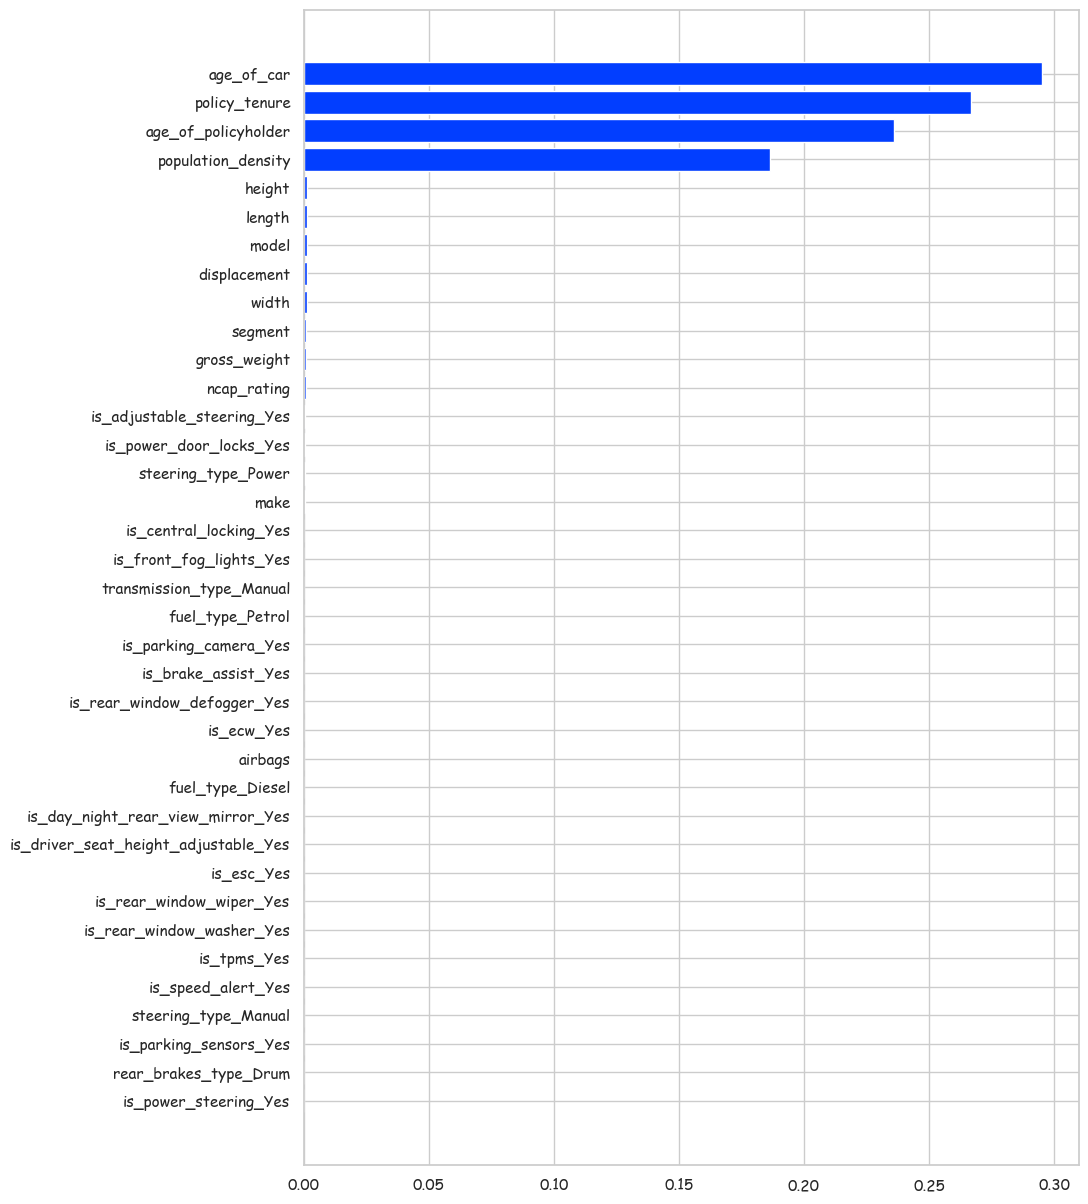

In [282]:
plt.figure(figsize=(10,15))
plt.barh(X_train_resampled.columns[sorted_features],rf.feature_importances_[sorted_features] )
plt.tight_layout

We can see that columns from ncp_rating to rear_brakes_type_Drum do not describe the target variable well hence we can drop these cols

In [283]:
X_train_resampled.columns[sorted_features]

Index(['is_power_steering_Yes', 'rear_brakes_type_Drum',
       'is_parking_sensors_Yes', 'steering_type_Manual', 'is_speed_alert_Yes',
       'is_tpms_Yes', 'is_rear_window_washer_Yes', 'is_rear_window_wiper_Yes',
       'is_esc_Yes', 'is_driver_seat_height_adjustable_Yes',
       'is_day_night_rear_view_mirror_Yes', 'fuel_type_Diesel', 'airbags',
       'is_ecw_Yes', 'is_rear_window_defogger_Yes', 'is_brake_assist_Yes',
       'is_parking_camera_Yes', 'fuel_type_Petrol', 'transmission_type_Manual',
       'is_front_fog_lights_Yes', 'is_central_locking_Yes', 'make',
       'steering_type_Power', 'is_power_door_locks_Yes',
       'is_adjustable_steering_Yes', 'ncap_rating', 'gross_weight', 'segment',
       'width', 'displacement', 'model', 'length', 'height',
       'population_density', 'age_of_policyholder', 'policy_tenure',
       'age_of_car'],
      dtype='object')

In [284]:
drp_cols_rf=['rear_brakes_type_Drum', 'is_speed_alert_Yes', 'is_parking_sensors_Yes',
       'steering_type_Manual', 'is_power_steering_Yes', 'is_tpms_Yes',
       'is_rear_window_wiper_Yes', 'is_rear_window_washer_Yes',
       'fuel_type_Diesel', 'is_rear_window_defogger_Yes',
       'is_driver_seat_height_adjustable_Yes',
       'is_day_night_rear_view_mirror_Yes', 'is_esc_Yes',
       'is_brake_assist_Yes', 'fuel_type_Petrol', 'airbags',
       'transmission_type_Manual', 'is_power_door_locks_Yes',
       'is_front_fog_lights_Yes', 'is_parking_camera_Yes', 'is_ecw_Yes',
       'steering_type_Power', 'is_central_locking_Yes', 'make',
       'is_adjustable_steering_Yes', 'ncap_rating']

In [285]:
len(drp_cols_rf)

26

In [286]:
X_train_resampled_dropped = X_train_resampled.drop(columns=drp_cols_rf, axis=1)
X_test_dropped = X_test.drop(columns=drp_cols_rf, axis=1)

In [287]:
print(X_train_resampled_dropped.shape)
print(X_test_dropped.shape)

(71168, 11)
(16327, 11)


In [288]:
X_train_resampled_dropped.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'segment', 'model', 'displacement', 'length',
       'width', 'height', 'gross_weight'],
      dtype='object')

In [289]:
X_train_resampled_dropped.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,segment,model,displacement,length,width,height,gross_weight
0,0.866633,0.09,0.634615,0.167444,0.0,0.4,0.571225,0.637427,0.803571,0.071429,0.536622
1,1.003787,0.16,0.692308,0.244748,0.4,0.1,0.992877,1.000000,0.937500,0.457143,1.000000
2,0.287479,0.10,0.346154,0.244748,0.4,0.1,0.992877,1.000000,0.937500,0.457143,1.000000
3,1.037020,0.04,0.701923,0.244748,0.0,0.2,0.571225,0.467836,0.773810,0.157143,0.424514
4,1.054967,0.22,0.394231,0.992949,0.0,0.2,0.571225,0.467836,0.773810,0.157143,0.424514


# Using Logistic Regression as our model again

In [290]:
from sklearn.linear_model import LogisticRegression
Log_reg = LogisticRegression()
Log_reg.fit(X_train_resampled_dropped, y_train_resampled)

LogisticRegression()

In [291]:
y_pred_2 = Log_reg.predict(X_test_dropped)

In [292]:
print(f"Accuracy on test data set is {accuracy_score(y_test, y_pred_2)*100}")

Accuracy on test data set is 56.03601396459852


In [293]:
print(confusion_matrix(y_test, y_pred_2))

[[8566 6726]
 [ 452  583]]


In [294]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.95      0.56      0.70     15292
           1       0.08      0.56      0.14      1035

    accuracy                           0.56     16327
   macro avg       0.51      0.56      0.42     16327
weighted avg       0.89      0.56      0.67     16327



# Using KNeighborsClassifier as our model again

In [295]:
from sklearn.neighbors import KNeighborsClassifier
kneigh = KNeighborsClassifier()
kneigh.fit(X_train_resampled_dropped, y_train_resampled)

y_pred_knn_2 = kneigh.predict(X_test_dropped)
print(f"Accuracy of Test dataset by KNN is {accuracy_score(y_test, y_pred_knn_2)*100}")

Accuracy of Test dataset by KNN is 70.51509769094139


In [296]:
print(confusion_matrix(y_test, y_pred_knn_2))

[[11204  4088]
 [  726   309]]


In [297]:
print(classification_report(y_test,y_pred_knn_2))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82     15292
           1       0.07      0.30      0.11      1035

    accuracy                           0.71     16327
   macro avg       0.50      0.52      0.47     16327
weighted avg       0.88      0.71      0.78     16327



# Using Random Forest as our model again

In [298]:
from sklearn.ensemble import RandomForestClassifier
rand_for = RandomForestClassifier()
rand_for.fit(X_train_resampled_dropped, y_train_resampled)

RandomForestClassifier()

In [299]:
y_pred_rf_2 = rand_for.predict(X_test_dropped)


In [300]:
print(f"Accuracy of Test dataset by Random Forest is {accuracy_score(y_test, y_pred_rf_2)*100}")

Accuracy of Test dataset by Random Forest is 89.6061738225026


In [301]:
print(confusion_matrix(y_test, y_pred_rf_2))

[[14567   725]
 [  972    63]]


In [302]:
print(classification_report(y_test,y_pred_rf_2))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     15292
           1       0.08      0.06      0.07      1035

    accuracy                           0.90     16327
   macro avg       0.51      0.51      0.51     16327
weighted avg       0.88      0.90      0.89     16327



# Using HyperParameter tuning = RandomSearchCV for all the 3 algorithms

# 1. LOGISTIC REGRESSION

In [303]:
from sklearn.linear_model import LogisticRegression
Log_reg_hyper = LogisticRegression()

from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'class_weight':[None, 'balanced'],"max_iter":[100, 200, 500, 1000], "tol":[1e-4, 1e-3, 1e-2]}

In [304]:
rsearch_lr = RandomizedSearchCV(estimator=Log_reg_hyper, param_distributions=param_grid,n_iter=10, scoring="accuracy",cv=10,refit=True,verbose=3,n_jobs=-1)
rsearch_lr.fit(X_train_resampled_dropped, y_train_resampled)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'class_weight': [None, 'balanced'],
                                        'max_iter': [100, 200, 500, 1000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga'],
                                        'tol': [0.0001, 0.001, 0.01]},
                   scoring='accuracy', verbose=3)

In [305]:
print("Accuracy obtained after hyper-parameter tuning of Logistic Regression on training data is {}% ".format(np.round(rsearch_lr.best_score_*100,2)))

Accuracy obtained after hyper-parameter tuning of Logistic Regression on training data is 58.16% 


In [306]:
rsearch_lr.best_params_

{'tol': 0.001,
 'solver': 'saga',
 'penalty': 'l1',
 'max_iter': 500,
 'class_weight': 'balanced',
 'C': 100}

In [307]:
y_pred_hyper_lr=rsearch_lr.predict(X_test_dropped)


In [308]:
print("Accuracy obtained after hyper-parameter tuning of Logistic Regression on Test data is {}%".format(np.round(accuracy_score(y_test,y_pred_hyper_lr)*100,2)))

Accuracy obtained after hyper-parameter tuning of Logistic Regression on Test data is 56.25%


In [309]:
(confusion_matrix(y_test,y_pred_hyper_lr))

array([[8604, 6688],
       [ 455,  580]], dtype=int64)

In [310]:
print(classification_report(y_test,y_pred_hyper_lr))

              precision    recall  f1-score   support

           0       0.95      0.56      0.71     15292
           1       0.08      0.56      0.14      1035

    accuracy                           0.56     16327
   macro avg       0.51      0.56      0.42     16327
weighted avg       0.89      0.56      0.67     16327



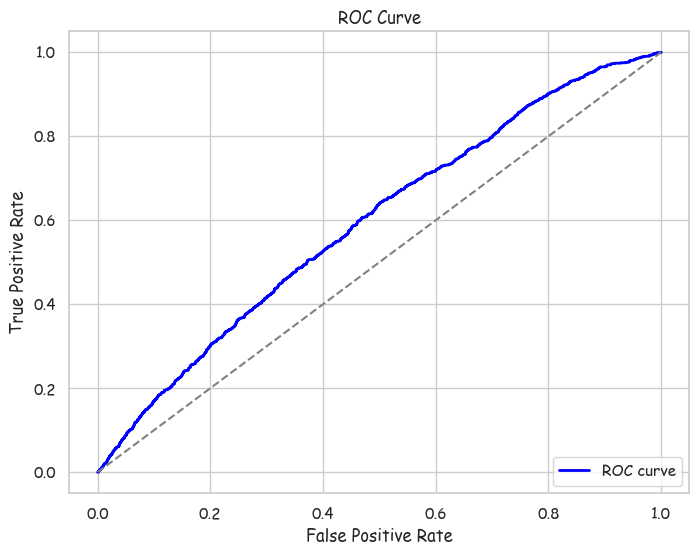

In [327]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_probs_lr = rsearch_lr.predict_proba(X_test_dropped)[:, 1]

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_probs_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [329]:
auc = roc_auc_score(y_test, y_probs_lr)
print('Area under curve = AUC:', auc)

Area under curve = AUC: 0.5941898829990359


# 2. KNN

In [311]:
from sklearn.neighbors import KNeighborsClassifier
knn_hyper = KNeighborsClassifier()

k = np.arange(1,31)
print(k)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [312]:
parameters =  {'n_neighbors':k, 'weights': ['uniform', 'distance'],"metric": ['euclidean', 'manhattan', 'chebyshev'],"algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'], "leaf_size":[10, 20, 30, 40, 50],"p":[1,2]}
rsearch_knn = RandomizedSearchCV(estimator=knn_hyper, param_distributions=parameters,n_iter=10, scoring="accuracy",cv=10,refit=True,verbose=3,n_jobs=-1)
rsearch_knn.fit(X_train_resampled_dropped, y_train_resampled)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 20, 30, 40, 50],
                                        'metric': ['euclidean', 'manhattan',
                                                   'chebyshev'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=3)

In [313]:
rsearch_knn.best_params_

{'weights': 'distance',
 'p': 2,
 'n_neighbors': 3,
 'metric': 'manhattan',
 'leaf_size': 10,
 'algorithm': 'kd_tree'}

In [314]:
print("Accuracy obtained after hyper-parameter tuning of KNN on training data is {}%".format(np.round(rsearch_knn.best_score_*100,2)))


Accuracy obtained after hyper-parameter tuning of KNN on training data is 87.05%


In [315]:
y_pred_hyper_knn=rsearch_knn.predict(X_test_dropped)
print("Accuracy obtained after hyper-parameter tuning of KNN on Test data is {}%".format(np.round(accuracy_score(y_test,y_pred_hyper_knn)*100,2)))

Accuracy obtained after hyper-parameter tuning of KNN on Test data is 76.13%


In [316]:
(confusion_matrix(y_test,y_pred_hyper_knn))

array([[12192,  3100],
       [  797,   238]], dtype=int64)

In [317]:
print(classification_report(y_test,y_pred_hyper_knn))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86     15292
           1       0.07      0.23      0.11      1035

    accuracy                           0.76     16327
   macro avg       0.50      0.51      0.49     16327
weighted avg       0.88      0.76      0.81     16327



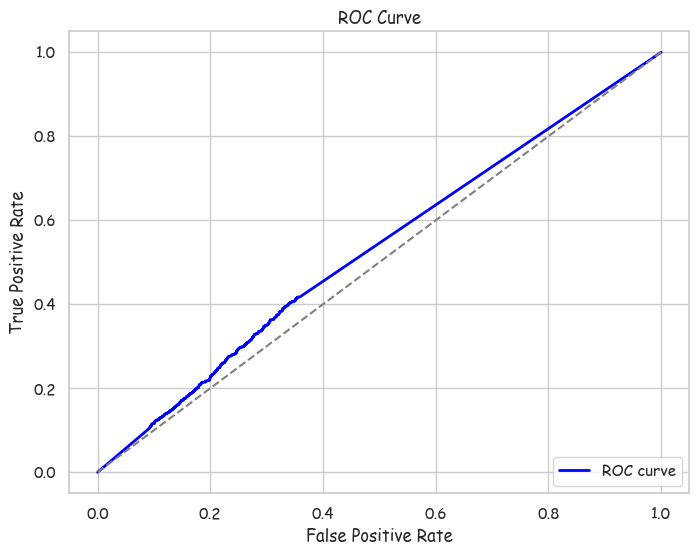

In [325]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_probs_knn = rsearch_knn.predict_proba(X_test_dropped)[:, 1]

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_probs_knn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [326]:
auc = roc_auc_score(y_test, y_probs_knn)
print('Area under curve = AUC:', auc)

Area under curve = AUC: 0.5290007341782069


# 3. Random Forest

In [318]:
from sklearn.ensemble import RandomForestClassifier

rfc_hyper= RandomForestClassifier()

param = {'n_estimators': [50, 100, 200, 300, 500], 'criterion': ['gini', 'entropy'], 'max_depth':[None, 10, 20, 30, 50], 
         "min_samples_split": [2, 5, 10],"min_samples_leaf":[1, 2, 4],"max_features":['auto', 'sqrt', 'log2', int],
         "bootstrap":[True, False]}
rsearch_rfc = RandomizedSearchCV(estimator=rfc_hyper,param_distributions=param,n_iter=10, refit=True, verbose = 3,n_jobs=-1, scoring="accuracy",cv=10 )
rsearch_rfc.fit(X_train_resampled_dropped, y_train_resampled)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 50],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         <class 'int'>],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300,
                                                         500]},
                   scoring='accuracy', verbose=3)

In [319]:
print("Accuracy obtained after hyper-parameter tuning of RandomForest on training data is {}%".format(np.round(rsearch_knn.best_score_*100,2)))

Accuracy obtained after hyper-parameter tuning of RandomForest on training data is 87.05%


In [320]:
y_pred_hyper_rfc=rsearch_rfc.predict(X_test_dropped)
print("Accuracy obtained after hyper-parameter tuning of RandomForest on Test data is {}%".format(np.round(accuracy_score(y_test,y_pred_hyper_rfc)*100,2)))

Accuracy obtained after hyper-parameter tuning of RandomForest on Test data is 89.69%


In [321]:
print(confusion_matrix(y_test,y_pred_hyper_rfc))


[[14590   702]
 [  981    54]]


In [322]:
print(classification_report(y_test,y_pred_hyper_rfc))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     15292
           1       0.07      0.05      0.06      1035

    accuracy                           0.90     16327
   macro avg       0.50      0.50      0.50     16327
weighted avg       0.88      0.90      0.89     16327



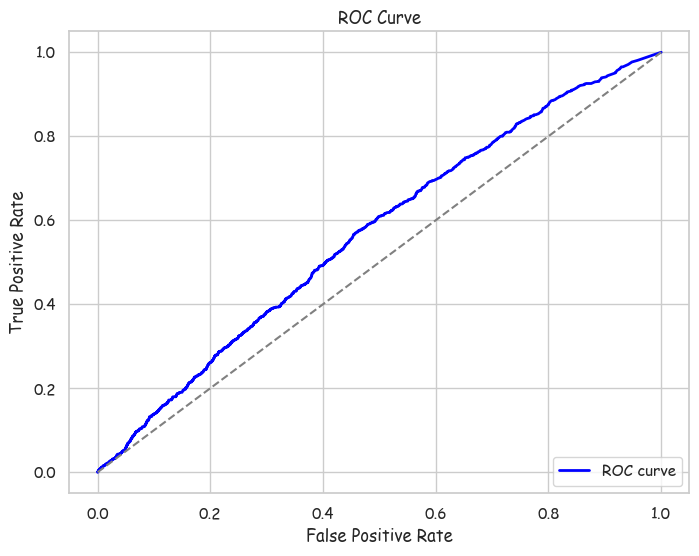

In [323]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_probs_rfc = rsearch_rfc.predict_proba(X_test_dropped)[:, 1]

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rfc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [324]:
auc = roc_auc_score(y_test, y_probs_rfc)
print('Area under curve = AUC:', auc)

Area under curve = AUC: 0.567649372410316


# Random Forest Classifier is the model of choice for the Predictive Modelling for Insurance Claim Probability based on Comprehensive Car Policy Features and Safety Ratings as it gives better accuracy than the rest of the models.

